<a href="https://colab.research.google.com/github/Angel-zaphkiel/madshoes/blob/master/pornai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://github.com/ai-enma/xdown && cd xdown
# !cd xdown && pip3 install -r requirements && touch list.txt
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
# !cd xdown && python3 xdown.py list.txt -O /content/gdrive/MyDrive/DATA

In [ ]:
import cv2
import math


name1= "African_ebony_"
name2= "African_fucking_"
name3= "African_pussy_"
name4= "African_breast_"


path1 = "/content/gdrive/MyDrive/DATA/at_studio.mp4"
path2 = "/content/gdrive/MyDrive/DATA/bad_bitch_masturbates_in_ma_absence.mp4"
path3 = "/content/gdrive/MyDrive/DATA/wet_pussy.mp4"
path4 = "/content/gdrive/MyDrive/DATA/xvideos.com_c719072400cd3e1c80f5b67282e97ff7.mp4"



cap = cv2.VideoCapture(path4)
frameRate = cap.get(5) #frame rate
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 15):
        filename = ("/content/gdrive/MyDrive/OUTPUT/"+ str(name4)) + str(int(frameId)) + ".jpg"
        cv2.imwrite(filename, frame)
cap.release()
print(filename)

/content/gdrive/MyDrive/OUTPUT/African_breast_2857.jpg


## for every video, let the A.i watch it and store the information in a dataset 


1. Create my own dataset. 
This dataset has all photo and video title in it.


In [ ]:
# !rm -rf /content/gdrive/MyDrive/OUTPUT && cd /content/gdrive/MyDrive/ && mkdir OUTPUT

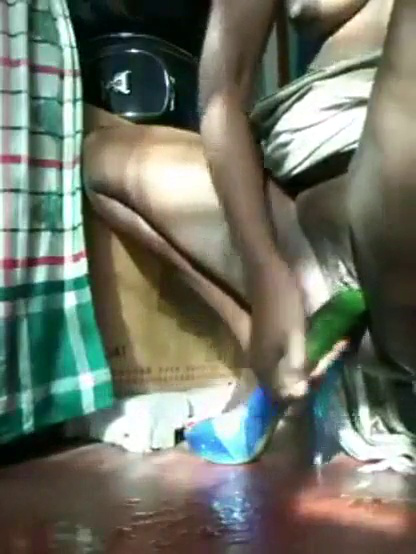

In [ ]:
from fastai.vision.all import *
from fastai.vision import *
from glob import glob


# path = untar_data(URLs.IMAGENETTE_160)

path = "/content/gdrive/MyDrive/OUTPUT"
images_of_girls =  "/content/gdrive/MyDrive/OUTPUT"
t = get_image_files(path)
t[0]
files = L(glob(f'{path}/**/*.jpg', recursive=True)).map(Path)
files[0]
im = Image.open(files[3])
im


In [ ]:
files = get_image_files(path)
len(files)

409

In [ ]:
files[0],files[200]


(Path('/content/gdrive/MyDrive/OUTPUT/African_ebony_15.jpg'),
 Path('/content/gdrive/MyDrive/OUTPUT/African_fucking_3885.jpg'))

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

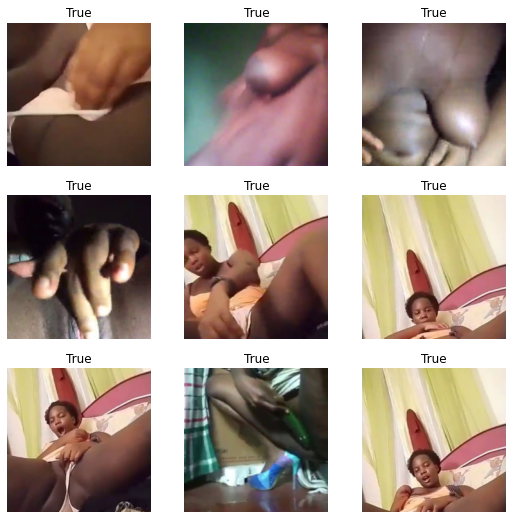

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,02:34


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,02:50


In [ ]:
learn.predict(files[0])

('True', tensor(0), tensor([1.]))

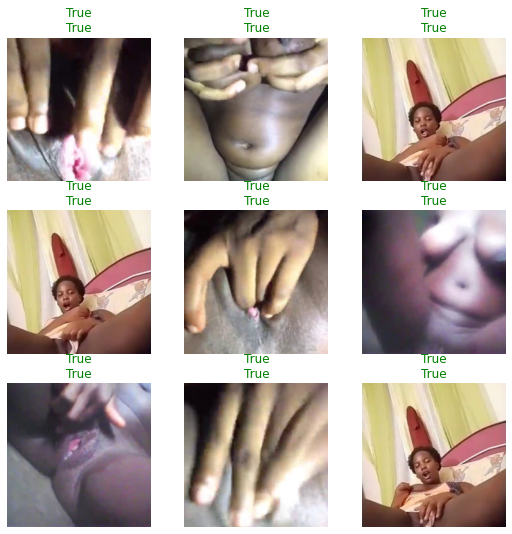

In [ ]:
learn.show_results()


In [ ]:
files[0].name


'African_ebony_15.jpg'

In [ ]:
pat = r'^(.*)_\d+.jpg'


In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))


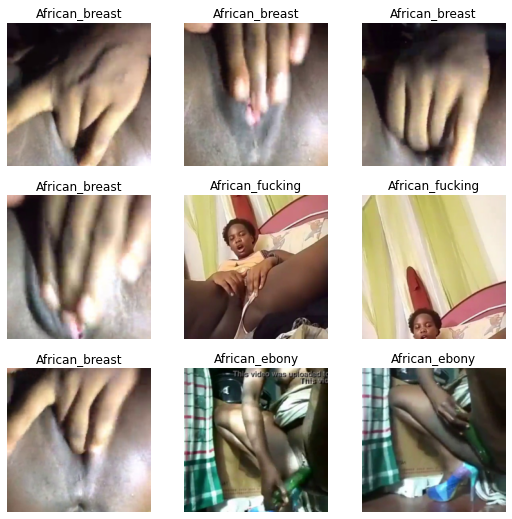

In [ ]:
dls.show_batch()


In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

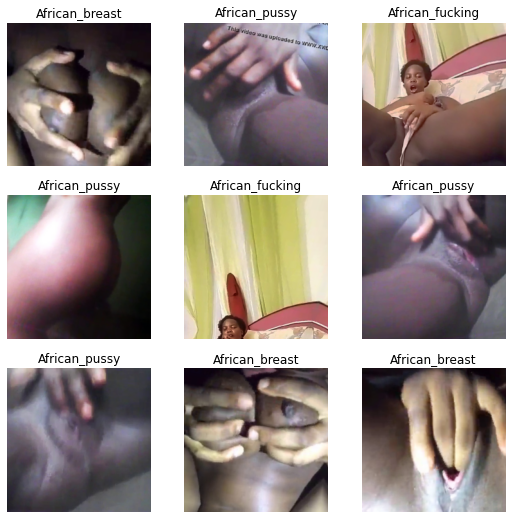

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.lr_find()

KeyboardInterrupt: ignored

In [ ]:
learn.fine_tune(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.697798,0.349924,0.148148,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.065305,0.010327,0.000000,00:05


Path('/content/gdrive/MyDrive/OUTPUT/models/model-I.pth')

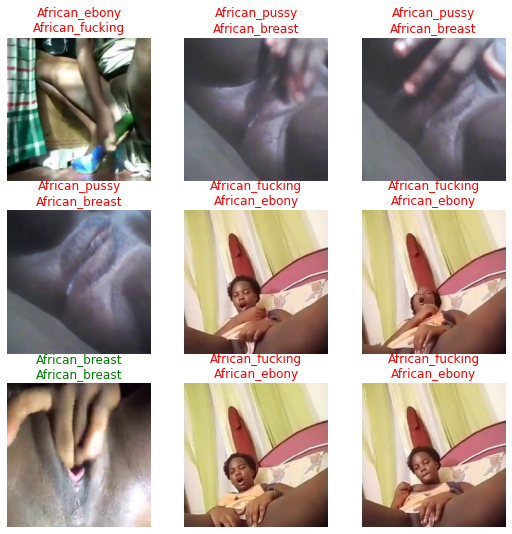

In [ ]:
learn.show_results()
learn.save('model-I')

In [ ]:
interp = Interpretation.from_learner(learn)

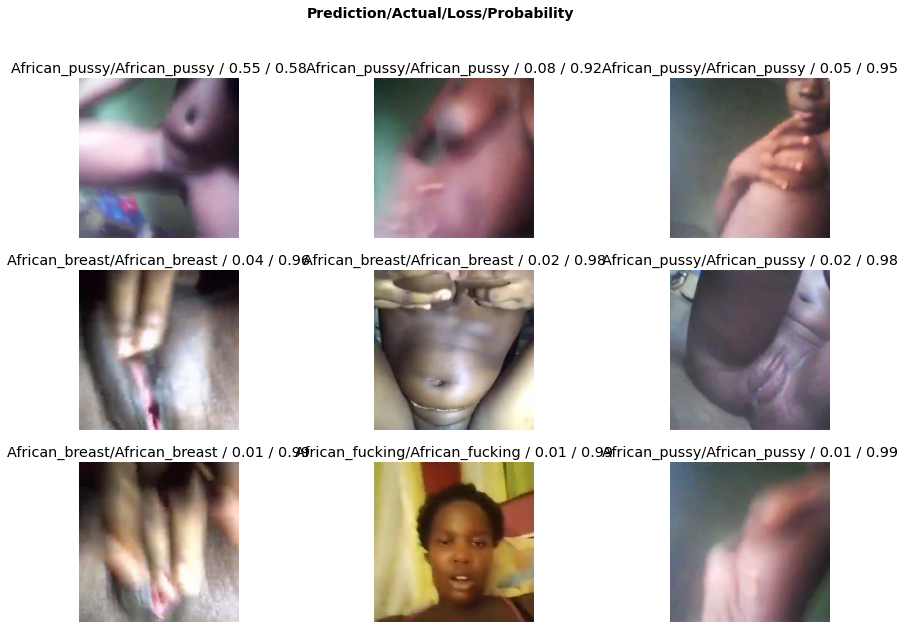

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
model=learn.load('/content/gdrive/MyDrive/OUTPUT/models/model-I.pth')
video_path='/content/gdrive/MyDrive/DATA/at_studio.mp4'

cap = cv2.VideoCapture(video_path)
_, frame= cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img_t = pil2tensor(frame, np.float32)
img_t.div_(255.0)
image = Image(img_t)
pred = model.predict(image)

FileNotFoundError: ignored